In [41]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stops = stopwords.words('english')
stops_dict = {}
for word in stops:
    stops_dict[word]=""

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
abspath = os.path.abspath('D:/Box Sync/editorials/scripts/')
os.chdir(abspath)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_help as clh

print("done")

done


In [2]:
# full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"
frequency_filename = "../data/frequency_wordlex.csv"


full_df = imp.init_df(full_filename, "full")
# full_df = full_df[full_df["year"]<2020]

print("done")

done


In [11]:
advice1_heat_filename = "../data/heatmap_data/heatmap1_advice_new.txt"
advice2_heat_filename = "../data/heatmap_data/heatmap2_advice_new.txt"
all1_heat_filename = "../data/heatmap_data/heatmap1_all_new.txt"
all2_heat_filename = "../data/heatmap_data/heatmap2_all_new.txt"

advice1_heat = pd.read_csv(advice1_heat_filename, delimiter="\t")
advice2_heat = pd.read_csv(advice2_heat_filename, delimiter="\t")
all1_heat = pd.read_csv(all1_heat_filename, delimiter="\t")
all2_heat = pd.read_csv(all2_heat_filename, delimiter="\t")

heat_dfs = [
    advice1_heat,
    advice2_heat,
    all1_heat,
    all2_heat
    ]
titles = ["advice_1","advice_2","all_1","all_2"]

for i in range(len(heat_dfs)):
    df = heat_dfs[i]
    # df["year"] = [int(year) for year in df["year"]]
    if i == 10:
        # print([col for col in df.columns])
        df["year"] = [str(year) for year in df["year"]]
        df = df.set_index("year")
        df = df.transpose()
    else:
        df = df.set_index("year")
    # df = df.reset_index()
    # print(df.head())
    df = df.drop(
        ["1996",
        "1997"],
        axis=1
    )

    df["mean"] = df.mean(axis=1)
    df = df.sort_values(by="mean", ascending=False)
    heat_dfs[i] = df

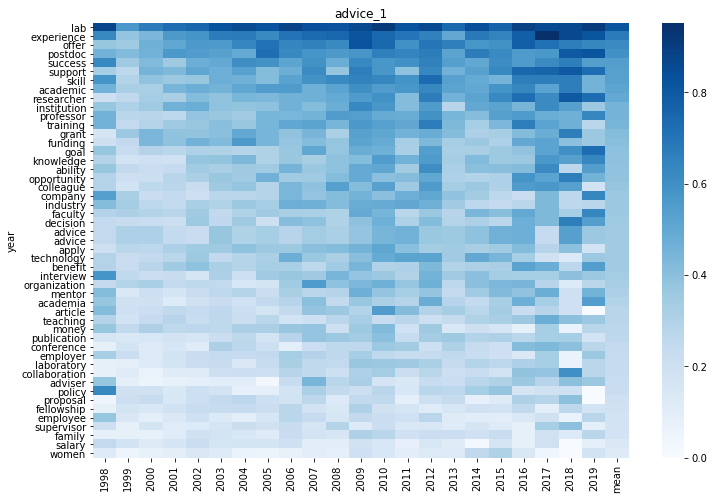

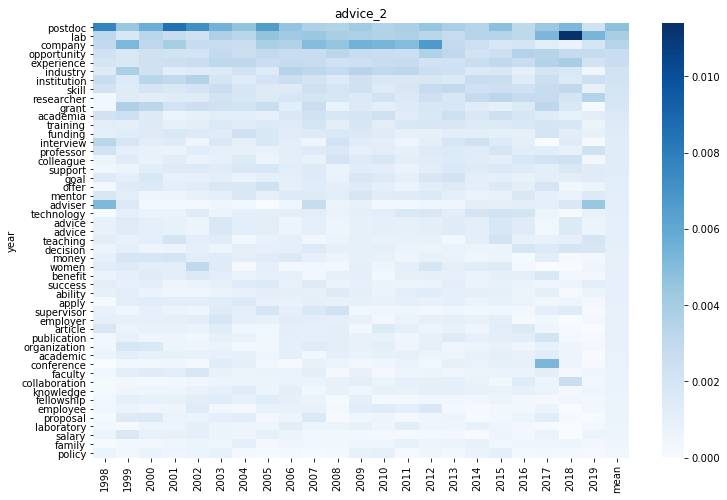

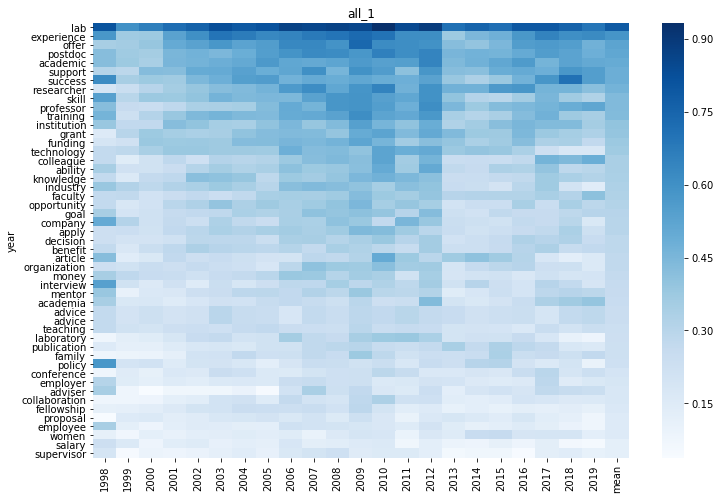

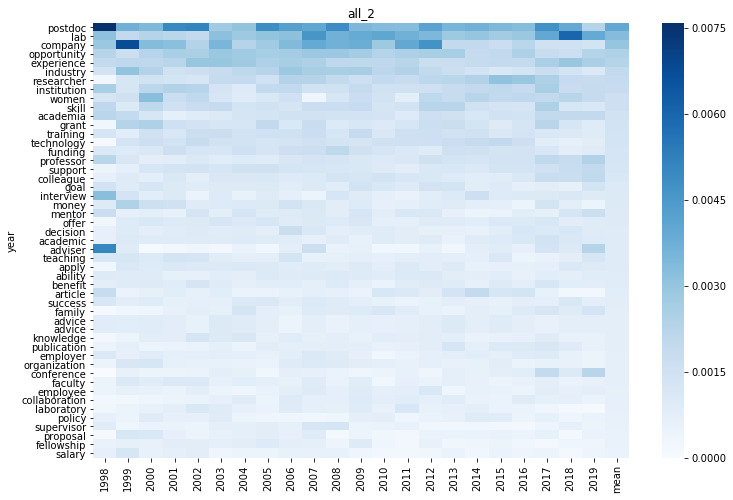

In [12]:
for i in range(len(heat_dfs)):
    df = heat_dfs[i]
    title = titles[i]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df, cmap = "Blues", xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories
    plt.title(title)
    plt.savefig("../figs/heatmaps/"+title+".png", bbox_inches="tight")

<Figure size 864x576 with 0 Axes>

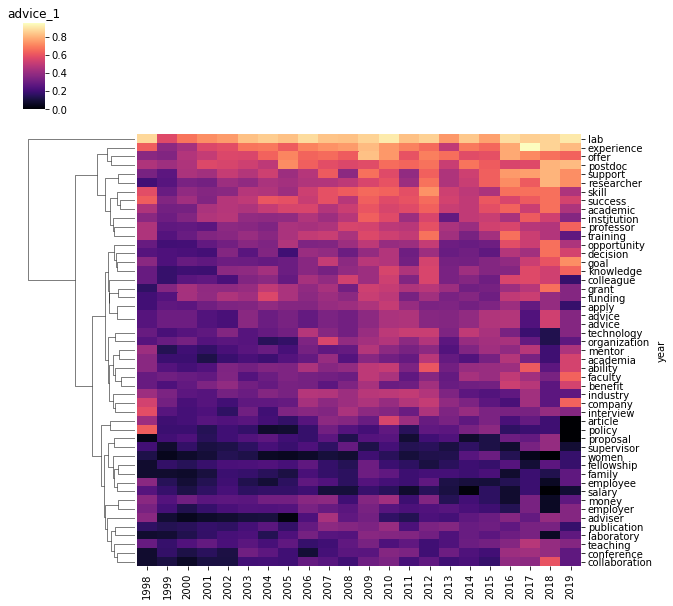

<Figure size 864x576 with 0 Axes>

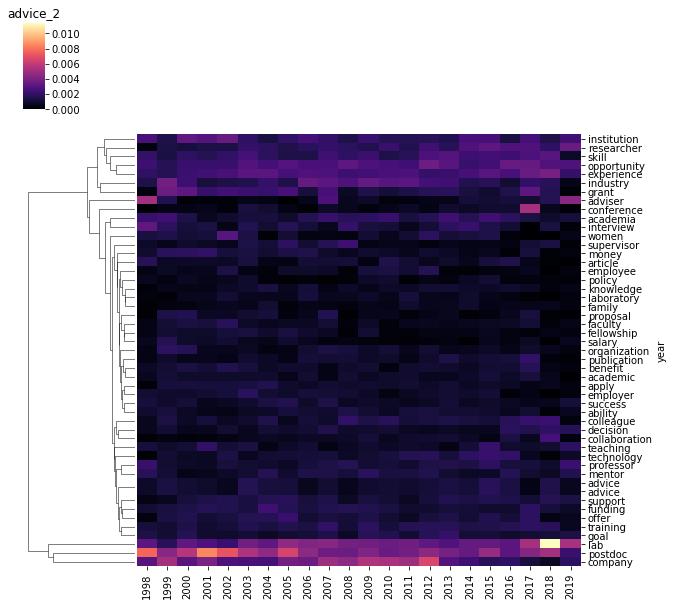

<Figure size 864x576 with 0 Axes>

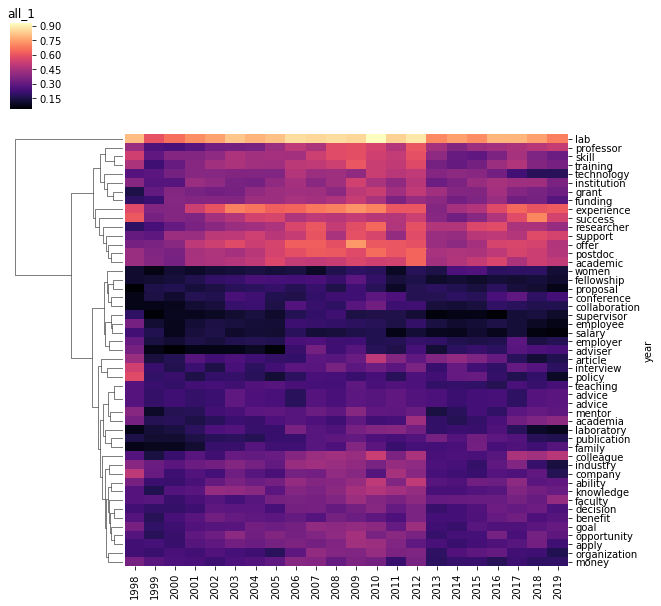

<Figure size 864x576 with 0 Axes>

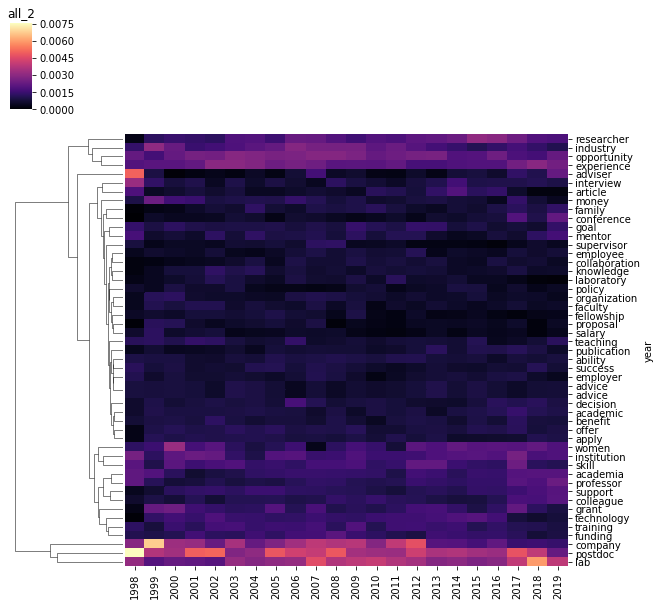

In [51]:
for i in range(len(heat_dfs)):
    df = heat_dfs[i].drop("mean",axis=1)
    title = titles[i]

    plt.figure(figsize=(12, 8))
    sns.clustermap(df, cmap = "magma", xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories
    plt.title(title)
    plt.savefig("../figs/heatmaps/cluster_"+title+".png", bbox_inches="tight")

<Figure size 864x576 with 0 Axes>

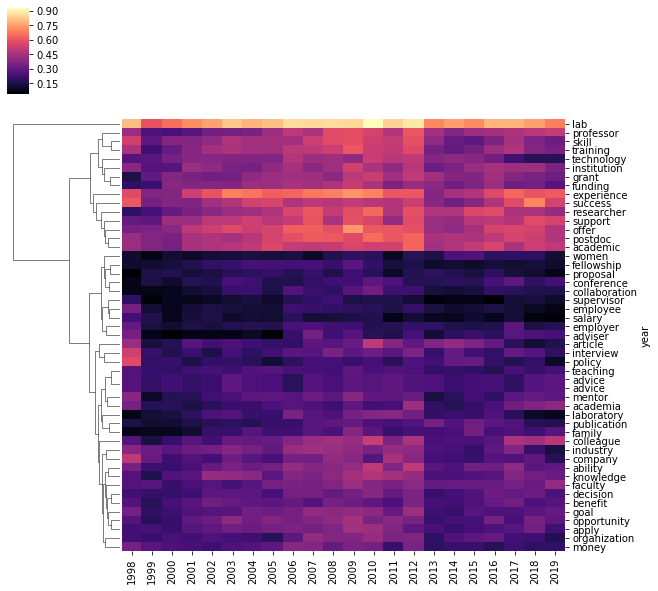

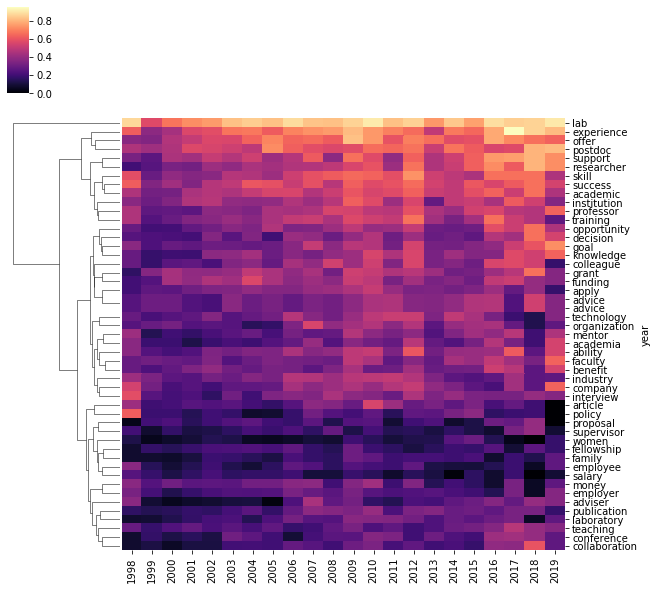

In [50]:
one = []
for i in [0,2]:
    df = heat_dfs[i].drop("mean",axis=1)
    one.append(df)
advice_df, all_df = one[0],one[1]
    # title = titles[i]

fig = plt.figure(figsize=(12, 8))
# ax1 = fig.add_subplot(1, 2, 1) # row, column, position
# ax2 = fig.add_subplot(1, 2, 2)

ax1 = sns.clustermap(all_df, cmap = "magma", col_cluster=False, xticklabels=True, yticklabels=True)
ax2 = sns.clustermap(advice_df, cmap = "magma", col_cluster=False, xticklabels=True, yticklabels=True)

# ax1.gs.update(bottom=0.05, top=0.45)

# gs2 = matplotlib.gridspec.GridSpec(1,1, top=0.6)
# # create axes within this new gridspec
# ax2 = ax1.fig.add_subplot(gs2[0])
# ax2.plot()

ax1
ax2

# plt.savefig("../figs/heatmaps/cluster_"+title+".png", bbox_inches="tight")

<Figure size 864x576 with 0 Axes>

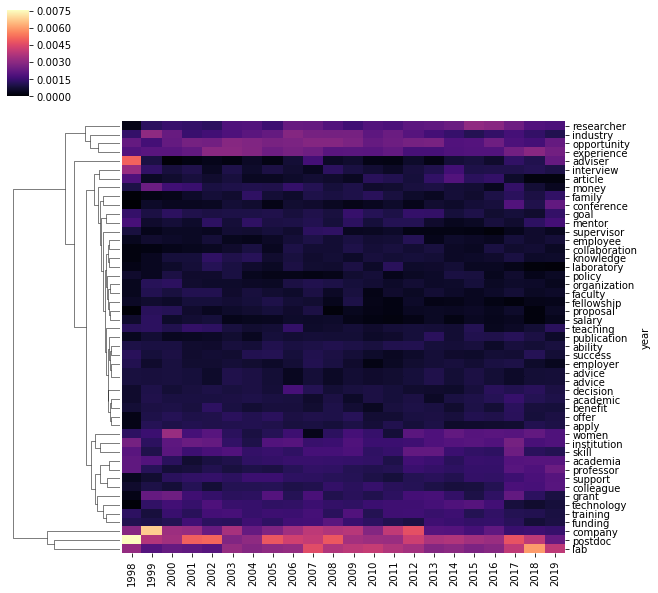

In [24]:
advice = heat_dfs[0].sort_index()
all_df = heat_dfs[2].sort_index()

dif_df = all_df.subtract(advice)

plt.figure(figsize=(12, 8))
# sns.heatmap(df, cmap = "magma", xticklabels=True, yticklabels=True)
sns.clustermap(df, cmap = "magma",col_cluster=False, xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories


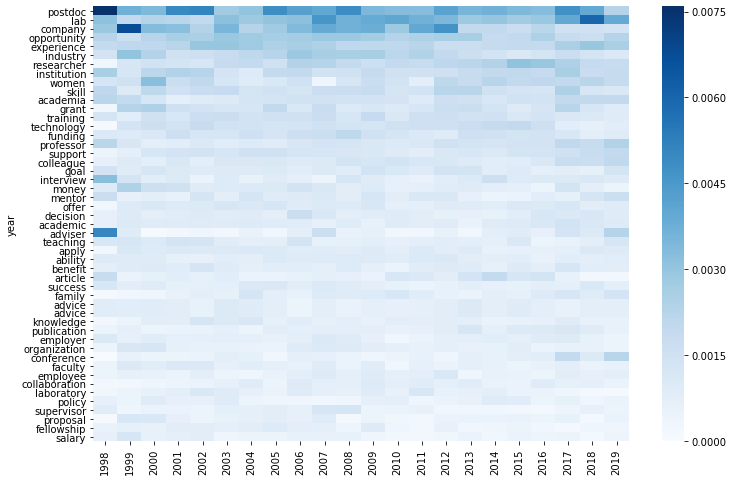

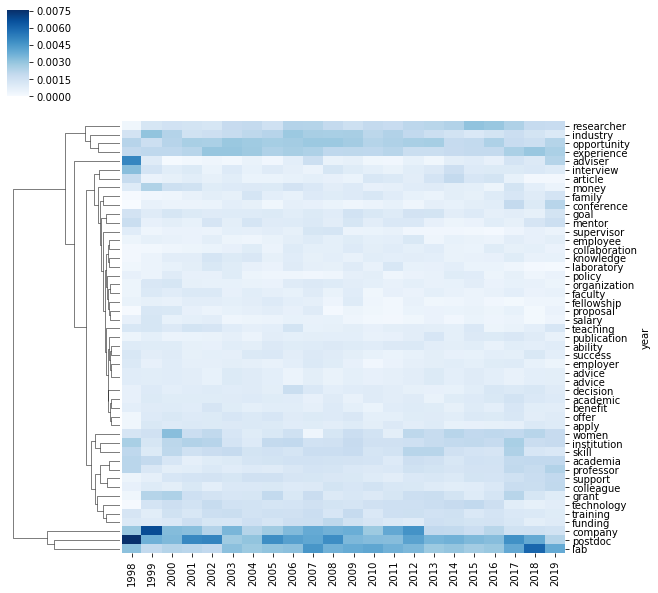

In [20]:
advice = heat_dfs[1].sort_index()
all_df = heat_dfs[3].sort_index()

dif_df = all_df.subtract(advice)

plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap = "Blues", xticklabels=True, yticklabels=True)
sns.clustermap(df, cmap = "Blues",col_cluster=False, xticklabels=True, yticklabels=True) # , xticklabels=categories, yticklabels=categories

In [66]:
all_df.sort_index().head()

1996  1997      1998      1999      2000      2001      2002      2003      2004      2005      2006      2007      2008      2009  \
year                                                                                                                                           
ability    0.5   1.0  0.346154  0.219608  0.215385  0.245763  0.308824  0.353965  0.323144  0.339683  0.411523  0.375000  0.387879  0.416107   
academia   0.5   0.0  0.346154  0.172549  0.179487  0.150424  0.184641  0.218569  0.211790  0.257143  0.275720  0.255435  0.230303  0.295302   
academic   0.5   0.0  0.423077  0.376471  0.343590  0.455508  0.467320  0.485493  0.504367  0.568254  0.514403  0.505435  0.521212  0.563758   
apply      1.0   0.0  0.230769  0.239216  0.215385  0.275424  0.294118  0.336557  0.318777  0.342857  0.362140  0.342391  0.369697  0.442953   
article    0.5   0.0  0.423077  0.141176  0.174359  0.273305  0.233660  0.253385  0.229258  0.203175  0.201646  0.288043  0.278788  0.315436   

              2010      2011      2012      2013      2014      2015      2016      2017      2018      2019      mean  
year                                                                                                                    
ability   0.500000  0.368056  0.503497  0.276364  0.261006  0.332168  0.322034  0.398148  0.285714  0.299213  0.374551  
academia  0.233333  0.243056  0.433566  0.200000  0.172956  0.202797  0.248588  0.333333  0.364286  0.393701  0.254297  
academic  0.541667  0.548611  0.643357  0.443636  0.474843  0.510490  0.559322  0.462963  0.528571  0.503937  0.476929  
apply     0.433333  0.368056  0.293706  0.250909  0.213836  0.234266  0.259887  0.277778  0.335714  0.228346  0.319421  
article   0.500000  0.375000  0.293706  0.367273  0.405660  0.363636  0.310734  0.185185  0.128571  0.165354  0.275435